In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [2]:
def print_evaluate(true, predicted):  
    
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [3]:
data = pd.read_csv("features_means_regression.csv")

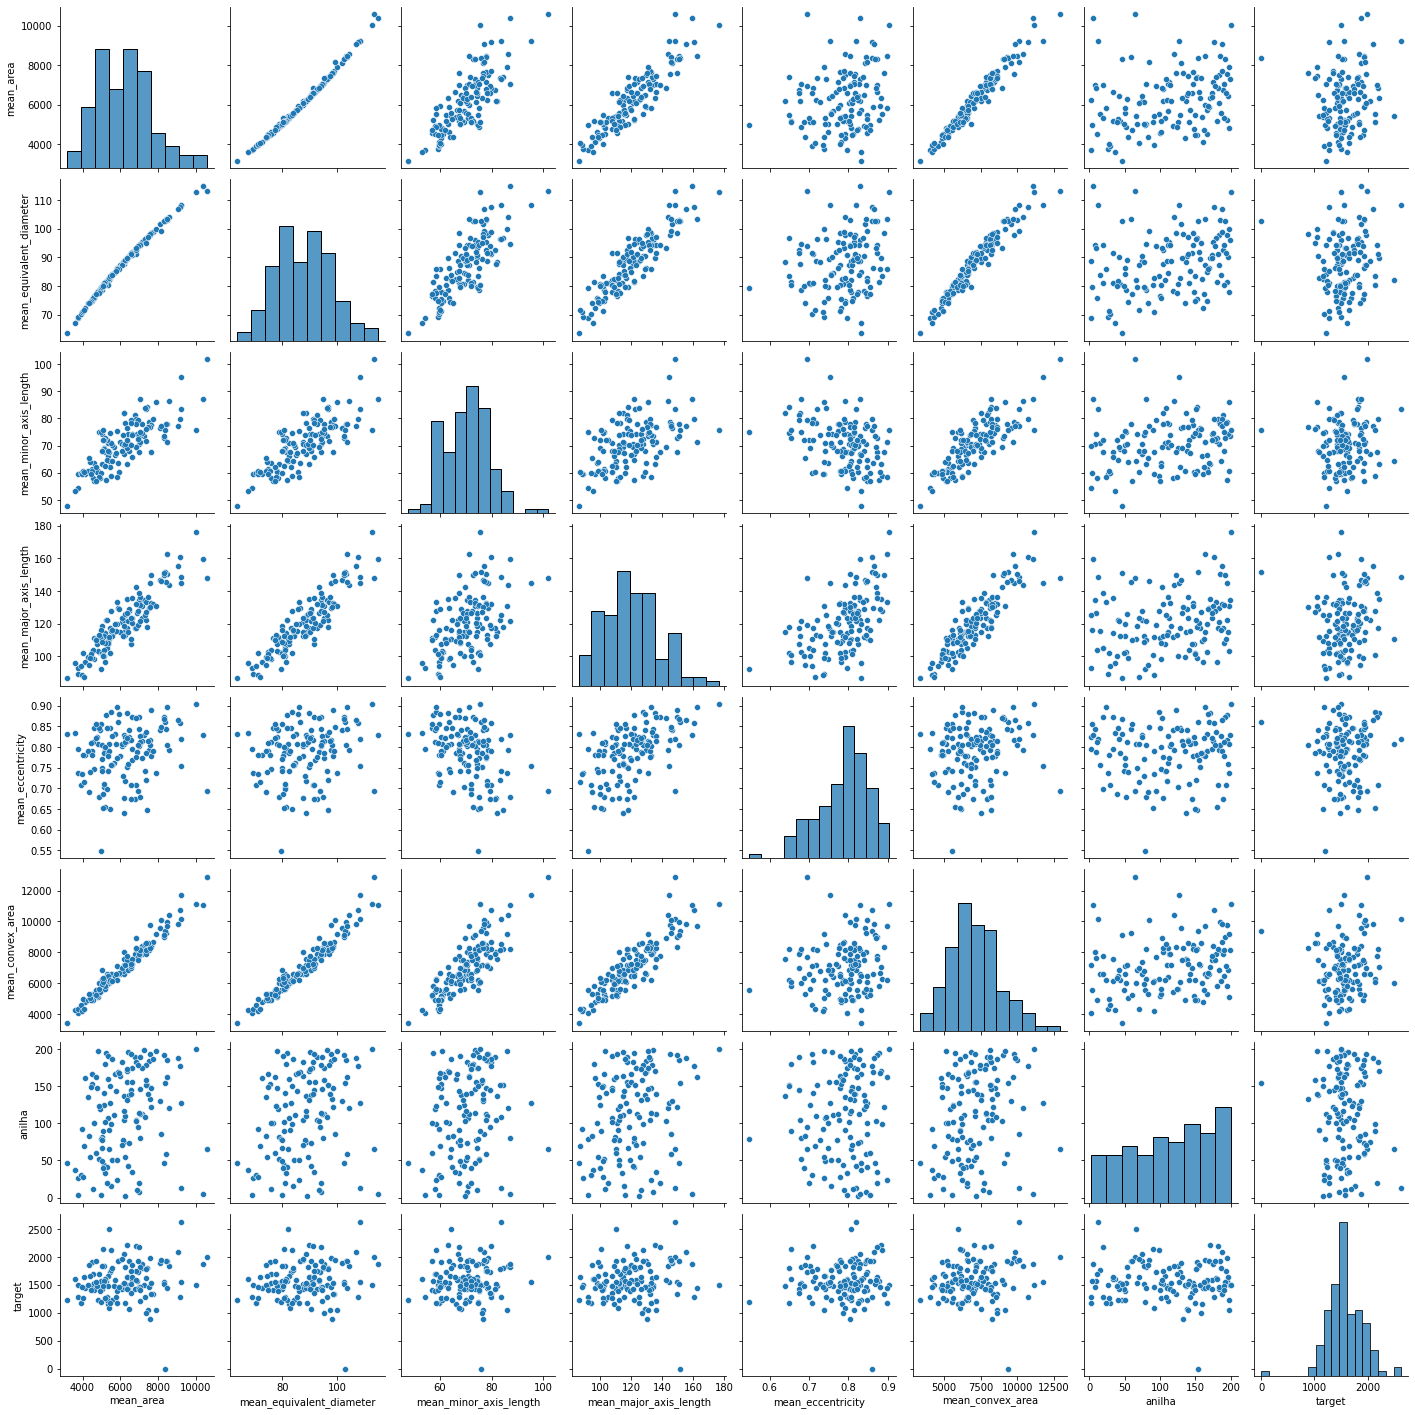

In [4]:
sns.pairplot(data)

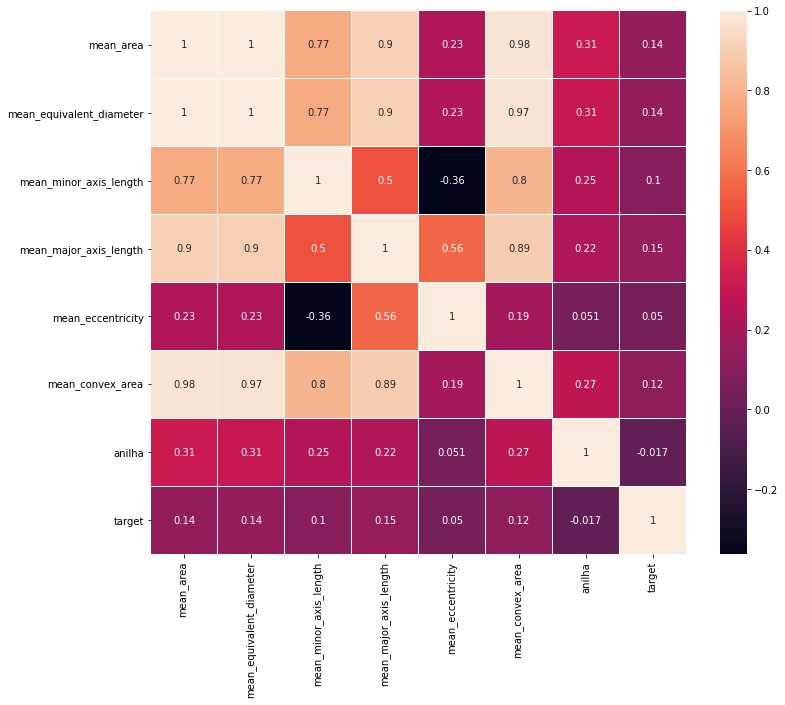

In [5]:
corrmat = data.corr(method='spearman')
_, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, linewidths=0.1, annot=True);

In [58]:
X = data[data.columns[:-2]]
y = data.target.values
ids = data.anilha.values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [60]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Random Forest

In [61]:
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

In [62]:
print('Métricas de Teste')
print_evaluate(y_test, test_pred)
print('-' * 30)
print('Métricas de Treino')
print_evaluate(y_train, train_pred)

Métricas de Teste
MAE: 270.7958636363636
MSE: 125837.95437834848
RMSE: 354.7364576391162
R2 Square -0.17460057782038985
------------------------------
Métricas de Treino
MAE: 100.47373846153846
MSE: 18451.791243584616
RMSE: 135.83737057078443
R2 Square 0.8324946292096268


<BarContainer object of 6 artists>

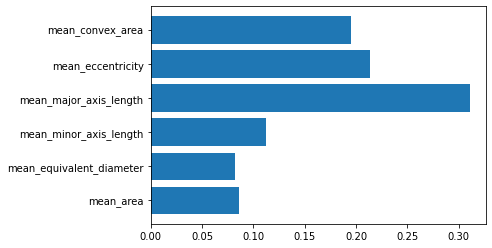

In [63]:
plt.barh(X.columns, rf_reg.feature_importances_)

## AdaBoost

In [64]:
reg = AdaBoostRegressor(random_state=0, n_estimators=1000)
reg.fit(X_train, y_train)

test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)

In [65]:
print('Métricas de Teste')
print_evaluate(y_test, test_pred)
print('-' * 30)
print('Métricas de Treino')
print_evaluate(y_train, train_pred)

Métricas de Teste
MAE: 271.1895098019836
MSE: 147482.23312823012
RMSE: 384.03415619997935
R2 Square -0.3766332829109207
------------------------------
Métricas de Treino
MAE: 145.89285031885925
MSE: 29687.126791930135
RMSE: 172.2995263833599
R2 Square 0.7305002470851156


## Bayesian

In [66]:
reg = BayesianRidge()
reg.fit(X_train, y_train)

test_pred = reg.predict(X_test)
train_pred = reg.predict(X_train)

In [67]:
print('Métricas de Teste')
print_evaluate(y_test, test_pred)
print('-' * 30)
print('Métricas de Treino')
print_evaluate(y_train, train_pred)

Métricas de Teste
MAE: 241.90971696847996
MSE: 108957.48187793972
RMSE: 330.0870822645741
R2 Square -0.01703434233275325
------------------------------
Métricas de Treino
MAE: 240.96144405173237
MSE: 110156.36827482004
RMSE: 331.8981293632431
R2 Square 4.298113865930375e-07
